# Time series on the stock market

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("datosdebolsa.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,8.97564,9.09396,8.70519,8.78970,1.790444,8140435.0
1,2000-01-04,8.45164,8.48544,8.18118,8.18118,1.666490,24190581.0
2,2000-01-05,8.18964,8.28260,8.01215,8.21499,1.673377,36945507.0
3,2000-01-06,8.23189,8.29106,7.99525,8.07976,1.645831,13890801.0
4,2000-01-07,8.11357,8.16428,8.04596,8.16428,1.663048,43027169.0


In [ ]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [ ]:
df.Date = pd.to_datetime(df.Date)
df.index = df.Date

In [ ]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2000-01-03,2000-01-03,8.97564,9.09396,8.70519,8.78970,1.790444,8140435.0
2000-01-04,2000-01-04,8.45164,8.48544,8.18118,8.18118,1.666490,24190581.0
2000-01-05,2000-01-05,8.18964,8.28260,8.01215,8.21499,1.673377,36945507.0
2000-01-06,2000-01-06,8.23189,8.29106,7.99525,8.07976,1.645831,13890801.0
2000-01-07,2000-01-07,8.11357,8.16428,8.04596,8.16428,1.663048,43027169.0
2000-01-10,2000-01-10,8.28260,8.36712,8.11357,8.33331,1.697479,18132583.0
2000-01-11,2000-01-11,8.26570,8.35022,8.11357,8.13893,1.657884,22208716.0
2000-01-12,2000-01-12,8.11357,8.16428,8.02905,8.12202,1.654439,10199208.0
2000-01-13,2000-01-13,8.24880,8.34177,8.07131,8.18118,1.666490,14801867.0


In [ ]:
df = df.set_index('Date').asfreq('d')
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,8.97564,9.09396,8.70519,8.78970,1.790444,8140435.0
2000-01-04,8.45164,8.48544,8.18118,8.18118,1.666490,24190581.0
2000-01-05,8.18964,8.28260,8.01215,8.21499,1.673377,36945507.0
2000-01-06,8.23189,8.29106,7.99525,8.07976,1.645831,13890801.0
2000-01-07,8.11357,8.16428,8.04596,8.16428,1.663048,43027169.0
2000-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-10,8.28260,8.36712,8.11357,8.33331,1.697479,18132583.0
2000-01-11,8.26570,8.35022,8.11357,8.13893,1.657884,22208716.0


In [ ]:
df = df.fillna(method="ffill")
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,8.97564,9.09396,8.70519,8.78970,1.790444,8140435.0
2000-01-04,8.45164,8.48544,8.18118,8.18118,1.666490,24190581.0
2000-01-05,8.18964,8.28260,8.01215,8.21499,1.673377,36945507.0
2000-01-06,8.23189,8.29106,7.99525,8.07976,1.645831,13890801.0
2000-01-07,8.11357,8.16428,8.04596,8.16428,1.663048,43027169.0
2000-01-08,8.11357,8.16428,8.04596,8.16428,1.663048,43027169.0
2000-01-09,8.11357,8.16428,8.04596,8.16428,1.663048,43027169.0
2000-01-10,8.28260,8.36712,8.11357,8.33331,1.697479,18132583.0
2000-01-11,8.26570,8.35022,8.11357,8.13893,1.657884,22208716.0


In [ ]:
df = df["2016-06":"2018-06"]

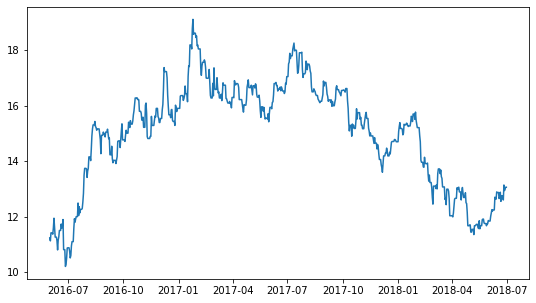

In [ ]:

plt.figure(figsize=(9,5))
plt.plot(df.Close);

# Making future predictions






In [ ]:
import seaborn as sns
import numpy as np
test_size = 60
window_size = 3

In [ ]:
df_shift = df.Close.shift(1)
df_mean_roll = df_shift.rolling(window_size).mean()
df_std_roll = df_shift.rolling(window_size).std()
df_mean_roll.name = "mean_roll"
df_std_roll.name = "std_roll"
df_mean_roll.index = df.index
df_std_roll.index = df.index

In [ ]:
df_shift.head(),df_mean_roll.head(),df_std_roll.head()

(Date
 2016-06-01        NaN
 2016-06-02    11.2308
 2016-06-03    11.1250
 2016-06-04    11.4135
 2016-06-05    11.4135
 Freq: D, Name: Close, dtype: float64, Date
 2016-06-01          NaN
 2016-06-02          NaN
 2016-06-03          NaN
 2016-06-04    11.256433
 2016-06-05    11.317333
 Freq: D, Name: mean_roll, dtype: float64, Date
 2016-06-01         NaN
 2016-06-02         NaN
 2016-06-03         NaN
 2016-06-04    0.145948
 2016-06-05    0.166566
 Freq: D, Name: std_roll, dtype: float64)

In [ ]:
df_w = pd.concat([df.Close,df_mean_roll,df_std_roll],axis=1)
df_w.head(10)

,Close,mean_roll,std_roll
Date,,,
2016-06-01,11.2308,NaN,NaN
2016-06-02,11.1250,NaN,NaN
2016-06-03,11.4135,NaN,NaN
2016-06-04,11.4135,11.256433,1.459482e-01
2016-06-05,11.4135,11.317333,1.665656e-01
2016-06-06,11.3654,11.413500,1.178040e-08
2016-06-07,11.5962,11.397467,2.777055e-02
2016-06-08,11.9423,11.458367,1.217659e-01
2016-06-09,11.5769,11.634633,2.903640e-01


In [ ]:
df_w = df_w[window_size:]
df_w.head()

,Close,mean_roll,std_roll
Date,,,
2016-06-04,11.4135,11.256433,1.459482e-01
2016-06-05,11.4135,11.317333,1.665656e-01
2016-06-06,11.3654,11.413500,1.178040e-08
2016-06-07,11.5962,11.397467,2.777055e-02
2016-06-08,11.9423,11.458367,1.217659e-01


In [ ]:
test = df_w[-test_size:]
train = df_w[:-test_size]
X_test = test.drop("Close",axis = 1)
y_test = test["Close"]
X_train = train.drop("Close",axis = 1)
y_train = train["Close"]

In [ ]:
from sklearn.svm import SVR
clf = SVR(gamma="scale")
clf.fit(X_train, y_train)
y_train_hat = pd.Series(clf.predict(X_train),index=y_train.index)
y_test_hat = pd.Series(clf.predict(X_test),index=y_test.index)

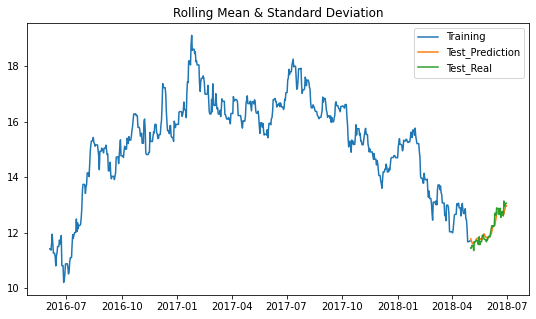

In [ ]:
plt.figure(figsize=(9,5))
plt.plot(y_train ,label='Training')
plt.plot(y_test_hat,label='Test_Prediction')
plt.plot(y_test , label='Test_Real')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation');

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_test_hat)
print('MSE: {}'.format(mse))

MSE: 0.025163154752358315


In [ ]:
clf.predict(X_train[0:1])

array([11.4325906])